In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Load the dataset
file_path = "cleaned_weather_data.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Data preparation: Convert 'Cloud Coverage' into categorical labels
def categorize_cloud_coverage(value):
    if value <= 10:
        return 'Clear Sky'
    elif value <= 30:
        return 'Few Clouds'
    elif value <= 60:
        return 'Scattered Clouds'
    elif value <= 80:
        return 'Broken Clouds'
    else:
        return 'Overcast Clouds'

data['Cloud Coverage Category'] = data['Cloud Coverage'].apply(categorize_cloud_coverage)

# Select features and target variable
features = ['Temperature', 'Humidity']  
target = 'Cloud Coverage Category'

X = data[features]
y = data[target]

In [18]:
# Encode target variable into numerical labels for SVM and XGBoost
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize features for SVM and XGBoost
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Sample 200 rows for SVM implementation
sample_data = data.sample(n=200, random_state=42)
X_sample = scaler.transform(sample_data[features])
y_sample = label_encoder.transform(sample_data[target])

# Train-test split for SVM (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Define kernels and C values for SVM
kernels = ['linear', 'rbf', 'poly']
C_values = [0.1, 1, 10]


SVM with linear kernel and C=0.1
Accuracy=0.5
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0 20  0  0  0]
 [ 0  4  0  0  0]
 [ 0 11  0  0  0]
 [ 0  3  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67        20
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         3

    accuracy                           0.50        40
   macro avg       0.10      0.20      0.13        40
weighted avg       0.25      0.50      0.33        40



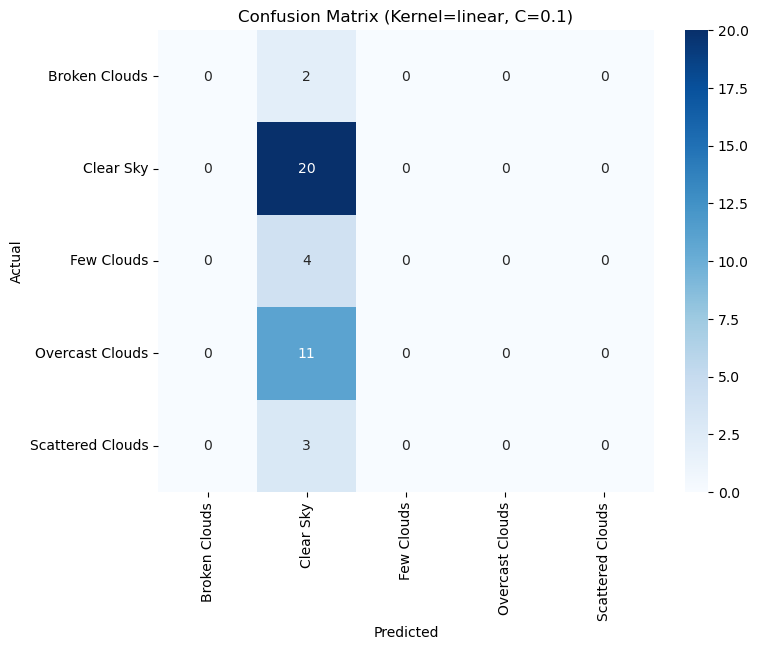

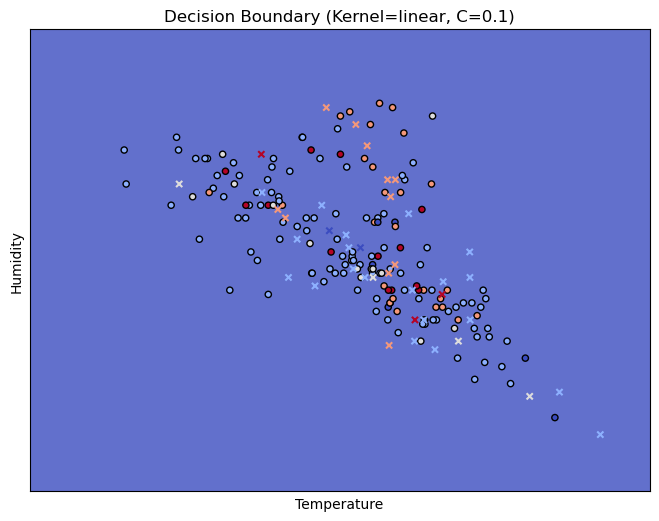


SVM with linear kernel and C=1
Accuracy=0.625
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0 20  0  0  0]
 [ 0  4  0  0  0]
 [ 0  6  0  5  0]
 [ 0  3  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.57      1.00      0.73        20
           2       0.00      0.00      0.00         4
           3       1.00      0.45      0.62        11
           4       0.00      0.00      0.00         3

    accuracy                           0.62        40
   macro avg       0.31      0.29      0.27        40
weighted avg       0.56      0.62      0.54        40



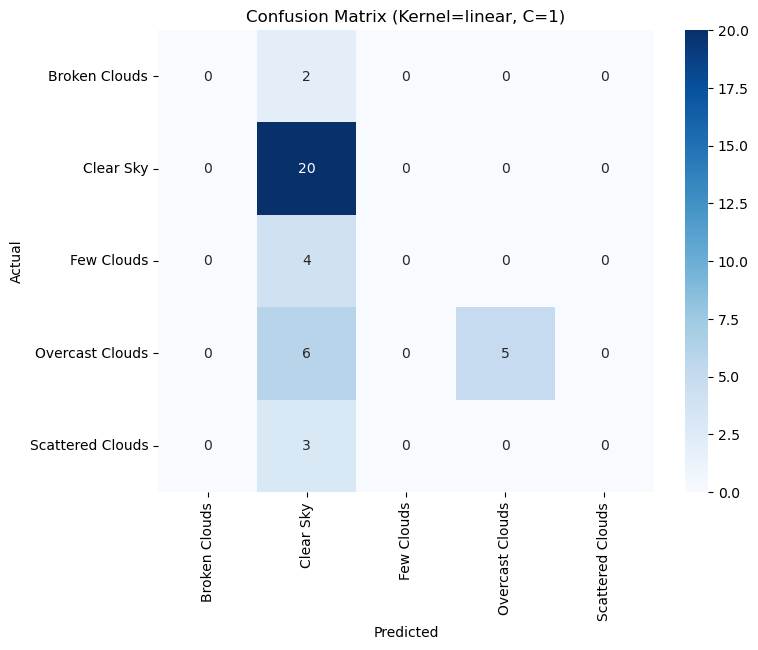

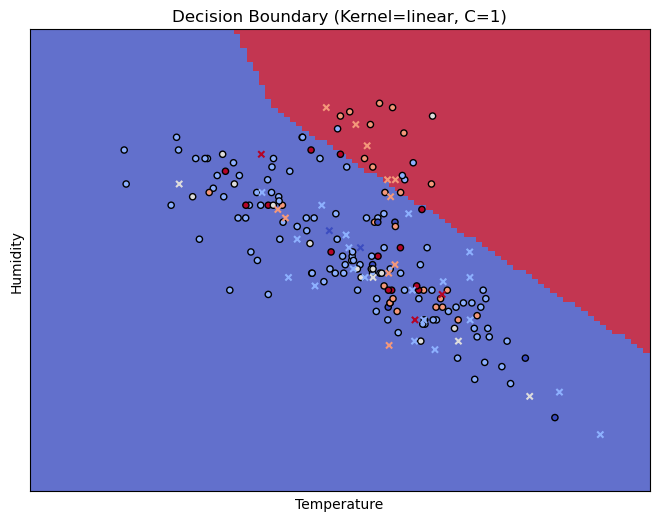


SVM with linear kernel and C=10
Accuracy=0.625
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0 20  0  0  0]
 [ 0  4  0  0  0]
 [ 0  6  0  5  0]
 [ 0  3  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.57      1.00      0.73        20
           2       0.00      0.00      0.00         4
           3       1.00      0.45      0.62        11
           4       0.00      0.00      0.00         3

    accuracy                           0.62        40
   macro avg       0.31      0.29      0.27        40
weighted avg       0.56      0.62      0.54        40



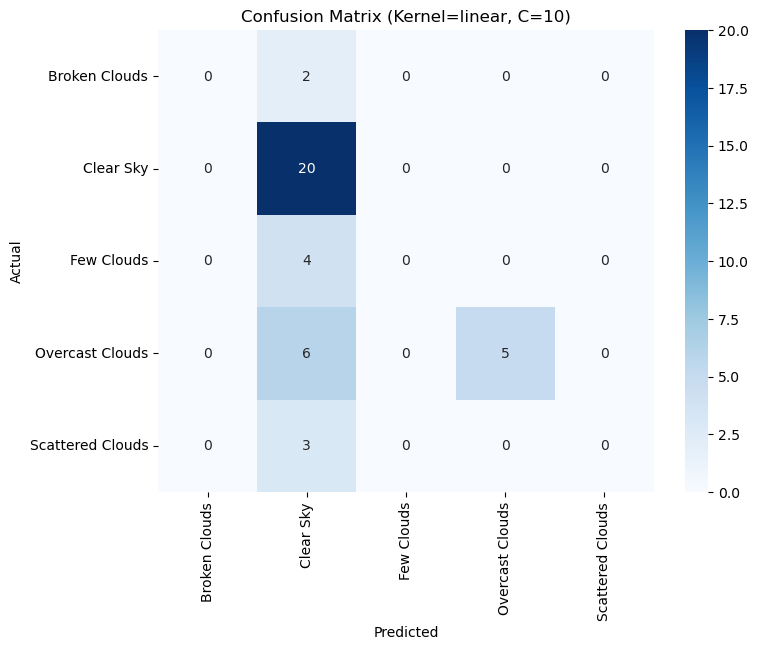

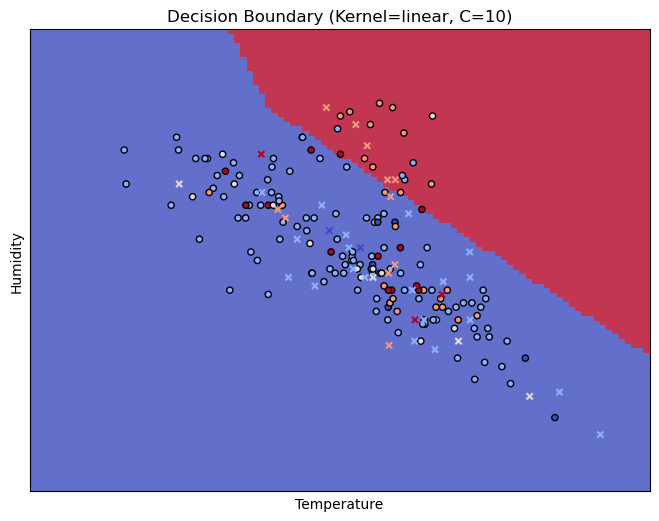


SVM with rbf kernel and C=0.1
Accuracy=0.5
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0 20  0  0  0]
 [ 0  4  0  0  0]
 [ 0 11  0  0  0]
 [ 0  3  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67        20
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         3

    accuracy                           0.50        40
   macro avg       0.10      0.20      0.13        40
weighted avg       0.25      0.50      0.33        40



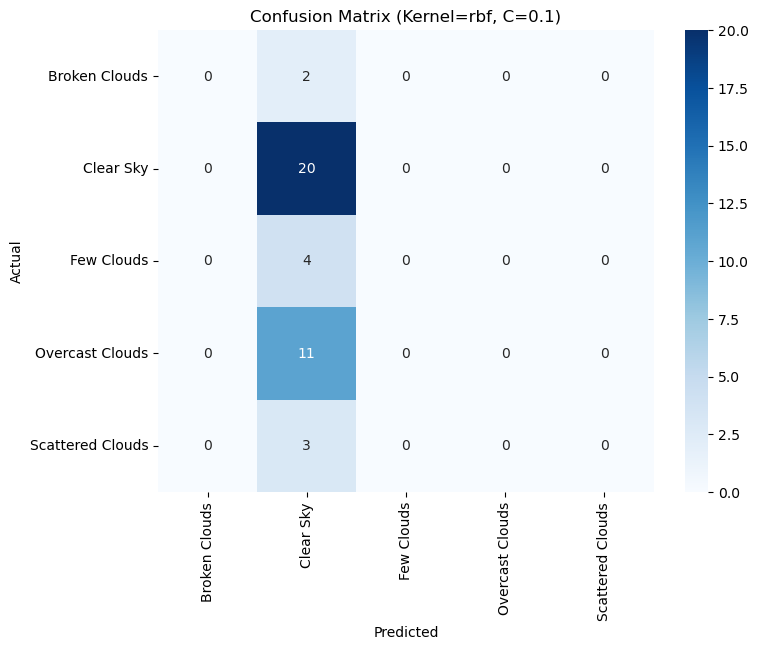

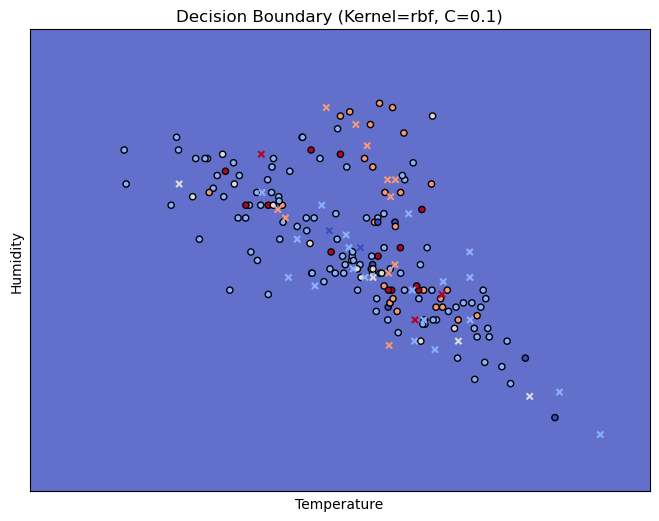


SVM with rbf kernel and C=1
Accuracy=0.575
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0 20  0  0  0]
 [ 0  4  0  0  0]
 [ 0  8  0  3  0]
 [ 0  3  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.54      1.00      0.70        20
           2       0.00      0.00      0.00         4
           3       1.00      0.27      0.43        11
           4       0.00      0.00      0.00         3

    accuracy                           0.57        40
   macro avg       0.31      0.25      0.23        40
weighted avg       0.55      0.57      0.47        40



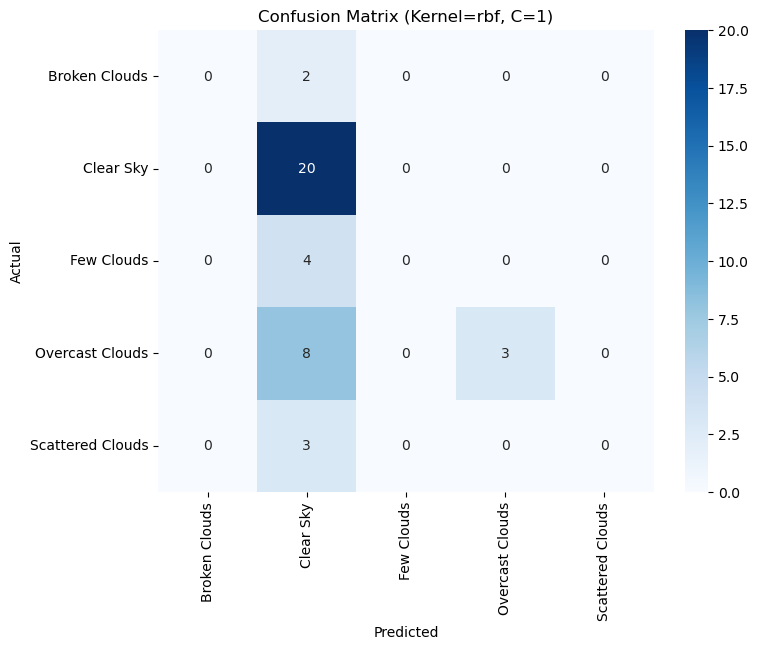

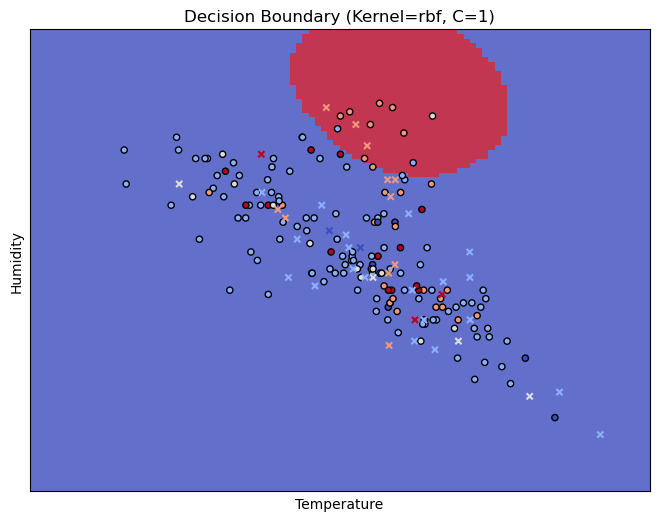


SVM with rbf kernel and C=10
Accuracy=0.525
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 2 18  0  0  0]
 [ 0  4  0  0  0]
 [ 0  8  0  3  0]
 [ 0  3  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.51      0.90      0.65        20
           2       0.00      0.00      0.00         4
           3       1.00      0.27      0.43        11
           4       0.00      0.00      0.00         3

    accuracy                           0.53        40
   macro avg       0.30      0.23      0.22        40
weighted avg       0.53      0.53      0.45        40



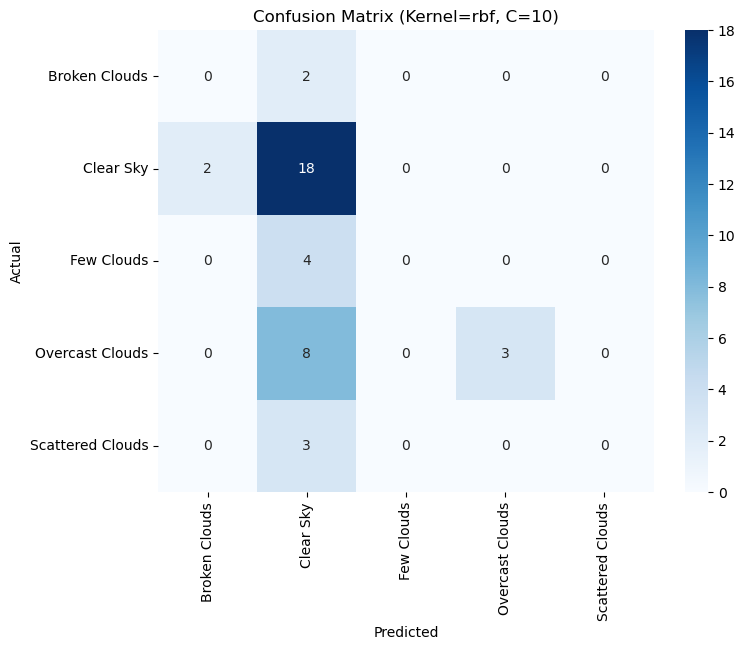

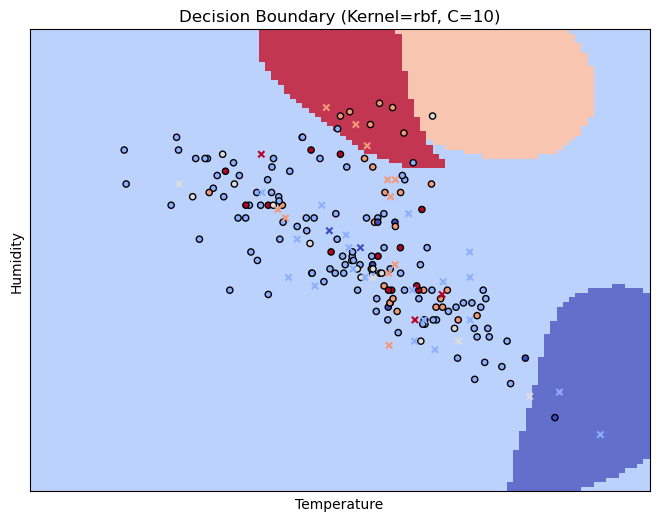


SVM with poly kernel and C=0.1
Accuracy=0.55
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0 20  0  0  0]
 [ 0  4  0  0  0]
 [ 0  9  0  2  0]
 [ 0  3  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.53      1.00      0.69        20
           2       0.00      0.00      0.00         4
           3       1.00      0.18      0.31        11
           4       0.00      0.00      0.00         3

    accuracy                           0.55        40
   macro avg       0.31      0.24      0.20        40
weighted avg       0.54      0.55      0.43        40



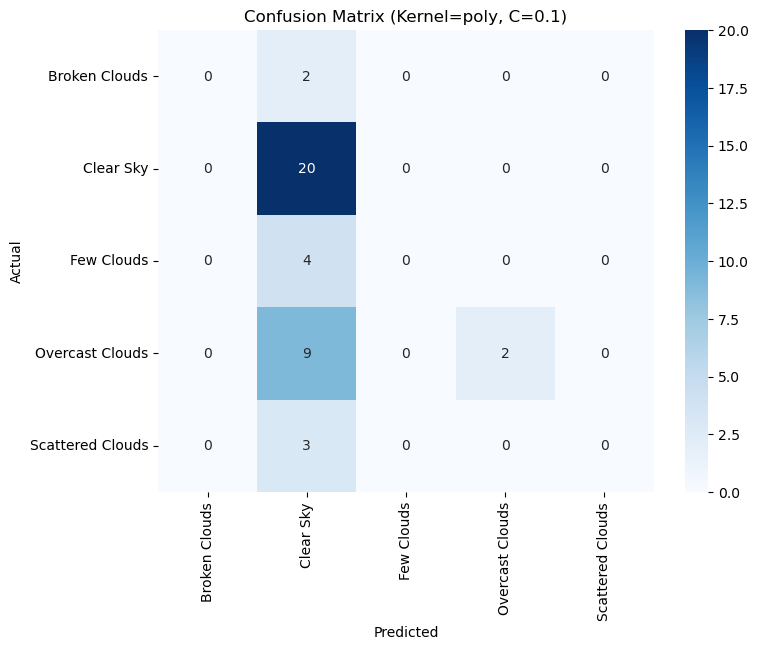

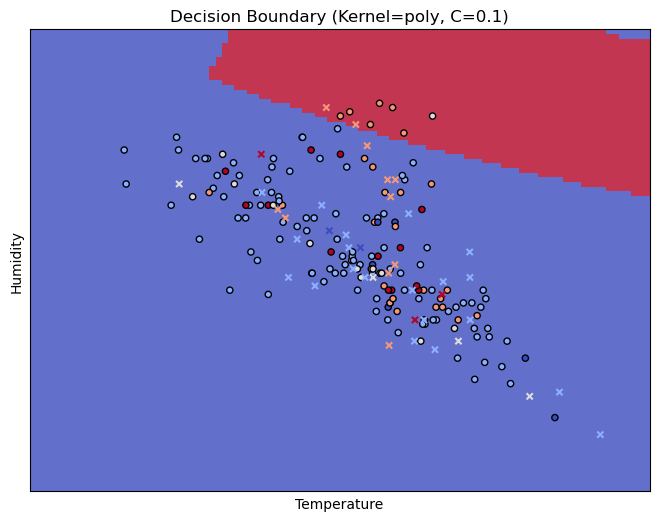


SVM with poly kernel and C=1
Accuracy=0.575
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0 20  0  0  0]
 [ 0  4  0  0  0]
 [ 0  8  0  3  0]
 [ 0  3  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.54      1.00      0.70        20
           2       0.00      0.00      0.00         4
           3       1.00      0.27      0.43        11
           4       0.00      0.00      0.00         3

    accuracy                           0.57        40
   macro avg       0.31      0.25      0.23        40
weighted avg       0.55      0.57      0.47        40



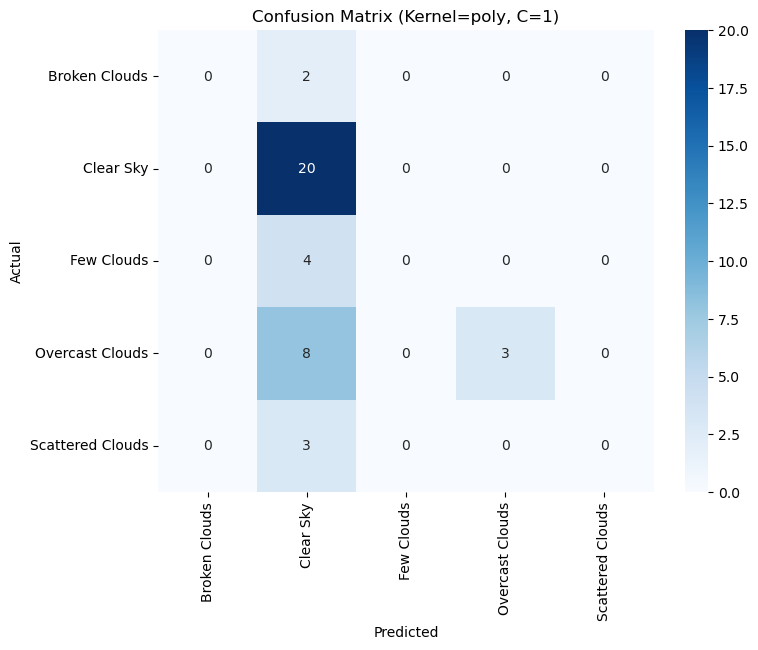

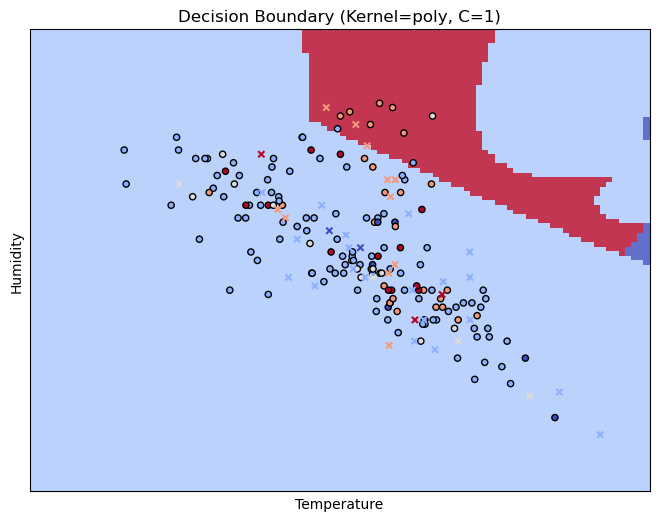


SVM with poly kernel and C=10
Accuracy=0.575
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0 20  0  0  0]
 [ 0  4  0  0  0]
 [ 0  8  0  3  0]
 [ 0  3  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.54      1.00      0.70        20
           2       0.00      0.00      0.00         4
           3       1.00      0.27      0.43        11
           4       0.00      0.00      0.00         3

    accuracy                           0.57        40
   macro avg       0.31      0.25      0.23        40
weighted avg       0.55      0.57      0.47        40



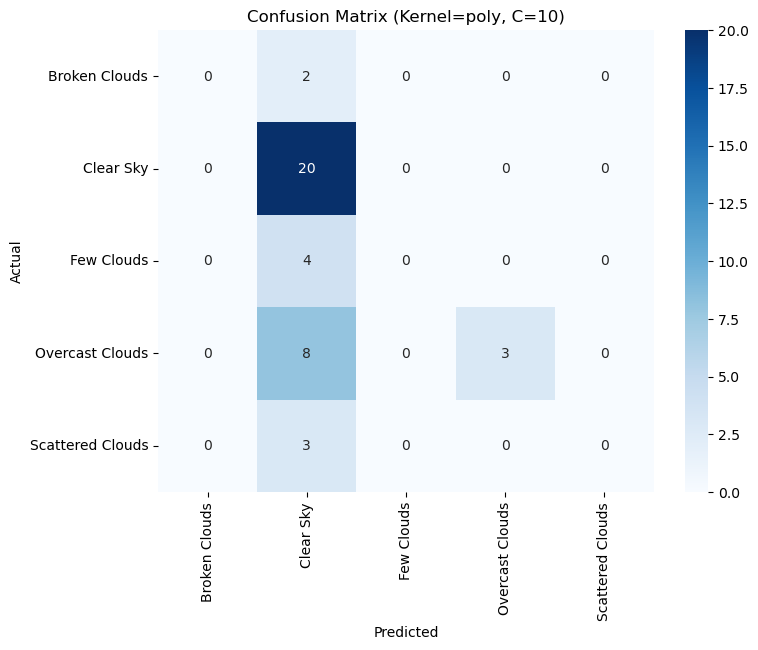

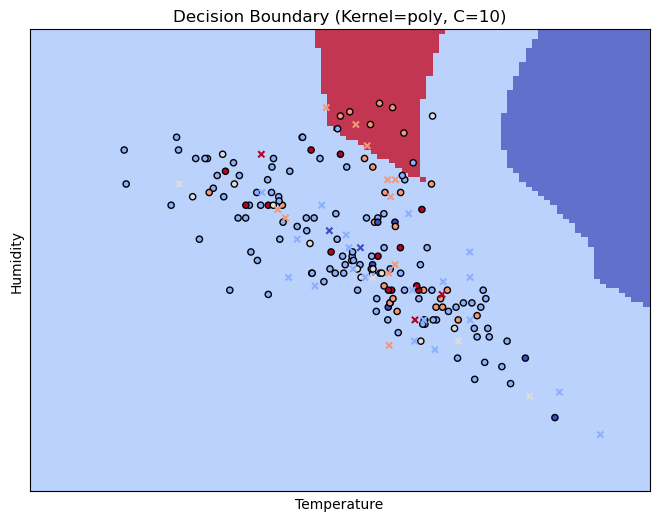

In [20]:
# Train and evaluate SVM models
for kernel in kernels:
    for C in C_values:
        print(f"\nSVM with {kernel} kernel and C={C}")
        
        # Train the SVM model using all features
        model = SVC(kernel=kernel, C=C)
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy={acc}")
        
        # Confusion matrix and classification report
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", classification_report(y_test, y_pred))
        
        # Visualize confusion matrix using heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.title(f"Confusion Matrix (Kernel={kernel}, C={C})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()
        
        # Decision boundary visualization using the first two features
        plt.figure(figsize=(8, 6))
        ax = plt.gca()
        
        # Use only the first two features for visualization
        DecisionBoundaryDisplay.from_estimator(
            model,
            X_train[:, [0, 1]],  # Use Temperature and Humidity for visualization
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax,
            response_method="predict",
            plot_method="pcolormesh",
            shading="auto",
        )

        # Plot the training points
        scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
        # Plot the testing points
        scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors="k",marker='x')
        ax.set_ylabel("Humidity")
        ax.set_xlabel("Temperature")
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(f"Decision Boundary (Kernel={kernel}, C={C})")
        plt.show()